## Environment Set Up

In [0]:
# # Environment Set UP
# # load the environment
# # 安装最新版本Keras
# # https://keras.io/
# !pip install keras
# # 安装 XGBoost
# # https://github.com/dmlc/xgboost
# !pip install -q xgboost
# # 安装 7Zip
# !apt-get -qq install -y libarchive-dev && pip install -q -U libarchive


# # 安装 PyDrive 操作库，该操作每个 notebook 只需要执行一次
# !pip install -U -q PyDrive

## Code for unzip file
# unzip
# import zipfile
# downloaded = drive.CreateFile({'id':'1lppUqbavyK9tJQxbb6pUJb7AtXgLQa7L'}) 
# downloaded.GetContentFile('mortality.zip')  
# with zipfile.ZipFile('mortality.zip', 'r') as zip_ref:
#     zip_ref.extractall('mortality_data')
#     zip_ref.close()
## Or use
#!unzip mortality.zip


## References:

CDC Cause-of-Death Analysis https://www.cdc.gov/nchs/nvss/mortality_public_use_data.htm (Links to an external site.)

ICD code:

https://www.cdc.gov/nchs/icd/icd10cm.htm (Links to an external site.)

allvalid2011 (detailed titles headings).pdfPreview the document

allvalid2011 (detailed titles headings).xlsPreview the document

## Import Package and authenrize 
（Start run from here）

In [0]:
# run this for anthentic
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# for data science
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import json
%matplotlib inline

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
# for file1 in file_list:
#   print('title: %s, id: %s, mimeType: %s' % (file1['title'], file1['id'], file1["mimeType"]))
cdc_list = drive.ListFile({'q': "'144fnA-4uAmg9DXgqwH-cIpr2pGiaa_gk' in parents"}).GetList()
for _file in cdc_list:
  print('title: %s, id: %s, mimeType: %s' % (_file['title'], _file['id'], _file["mimeType"]))
# print('connection succeed')

/usr/local/lib/python3.6/dist-packages/google/colab/auth.py:160: ResourceWarning: unclosed <ssl.SSLSocket fd=58, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 47146), raddr=('74.125.204.84', 443)>
  if _check_adc():


title: Data preprocessing.ipynb, id: 1lxoWVX-07xYu3j1TQ0HIMuAjOdZjgkrv, mimeType: application/vnd.google.colaboratory
title: CDC final report, id: 1lnRm3RNyNlrsGRXLQytyKkANMEYa6vfAifNT-s16-S8, mimeType: application/vnd.google-apps.presentation
title: NLP for Medical Transcript.ipynb, id: 1JSPF2LKbLpgjwABQOlDjfPbpdiigBKjW, mimeType: application/vnd.google.colaboratory
title: CDC Mortality Research Preliminary Report, id: 1mamC0cekq7MyGdnc_waOnuf6iz-jah3BUxA-O93Kev8, mimeType: application/vnd.google-apps.presentation
title: CDC Mortality.ipynb, id: 1mhTMTw8KStxotzcR0X6e28o2UqcWiPTi, mimeType: application/vnd.google.colaboratory
title: ICD_10th_structured_data, id: 1r16sAMg8snDytAqnMOzY6agENGOAycnl1M0YPaWx2j0, mimeType: application/vnd.google-apps.spreadsheet
title: icd_10_structure_complete.csv, id: 1rgwmASDfXvqcwEuH6uqLuT0xA6XeAX-n, mimeType: text/csv
title: Top10_ICD_Description_V2.csv, id: 1O1qx9fKjC4hqX80HncNqJejqSC6eBwTg, mimeType: text/csv
title: Top10_icd_description.csv, id: 1Eqo

In [0]:
data_list = drive.ListFile({'q': "'1MEFuqJTZQ-ufbvqyIH8wMTiPEA3wxR2w' in parents"}).GetList()
for _file in data_list:
  print('title: %s, id: %s, mimeType: %s' % (_file['title'], _file['id'], _file["mimeType"]))

title: train_lem.csv, id: 1PISPUiAzjYowMHuMTpw5iozS_Y_B7tcX, mimeType: text/csv
title: 2005_2015_model_data.csv, id: 1DNSbsqMccZBRlWam-dG38Q6pmtWfaqb3, mimeType: text/csv
title: medicaltranscriptions, id: 1znSw2V_xLdBIdq4i5G1gKHC_whI_U7qGS10ywWvWzL8, mimeType: application/vnd.google-apps.spreadsheet
title: train_orig.csv, id: 1rpyx5X5ZocXSGS8xs-R_pk7f2lDgwfJZ, mimeType: text/csv
title: medicaltranscriptions, id: 1M20GFlo-FfVrrOfkcauiaHl-ZLqwNmGBh06ZqAQNn4w, mimeType: application/vnd.google-apps.spreadsheet
title: medicaltranscriptions, id: 1h5-rtjt9orST6MYjm7tYVGoEKw9TVkoGVVrUkLJRcxc, mimeType: application/vnd.google-apps.spreadsheet
title: mortality_data, id: 1xccYQGplcGkNTjChjklu-_SnmNhCCJof, mimeType: application/vnd.google-apps.folder
title: mortality_data, id: 1msABm9exctDr5TcMYb22ySevvRpUzOZI, mimeType: application/vnd.google-apps.folder
title: mortality.zip, id: 1lppUqbavyK9tJQxbb6pUJb7AtXgLQa7L, mimeType: application/zip
title: medicaltranscriptions.csv, id: 1JDM776HTnYsgQiJwL-

In [0]:
for _file in drive.ListFile({'q': "'1xccYQGplcGkNTjChjklu-_SnmNhCCJof' in parents"}).GetList():
  print('title: %s, id: %s, mimeType: %s' % (_file['title'], _file['id'], _file["mimeType"]))

title: 2005_2015_model_data.csv, id: 1oRmD9c9Kbr5b6RXzdnLkP4G4H9yCzahj, mimeType: text/csv
title: 2005-2015_CDC_mortality.csv, id: 1VGSb65BvWQhbpVpnDRrGEV_pqkZfBKlL, mimeType: text/csv
title: 2012_data.csv, id: 1DbYAH8CyKsy78ZZjO5wXKVWcc7nvEjdu, mimeType: text/csv
title: 2013_data.csv, id: 1lZBmE_FPnXNXo6_GkyQxuv8v-AprqXkk, mimeType: text/csv
title: 2005_data.csv, id: 1QvgbXCWIspN2uO2_EKSCpmYX8BhkJYvp, mimeType: text/csv
title: 2008_data.csv, id: 1XyGz8ib1X7UrIPH_7_ZQQlEq2vI_J87O, mimeType: text/csv
title: 2009_data.csv, id: 1YbzuenAKIpexBWOgrL08fG7XBGmpmGxs, mimeType: text/csv
title: 2015_data.csv, id: 1SQPf3GoRp_HWvpTFxV_3mwOKB5WwPU9a, mimeType: text/csv
title: 2014_data.csv, id: 1HJ3K6eVdZ-esys2Arni7JiHYiQ7glTQe, mimeType: text/csv
title: 2006_data.csv, id: 1NndAOh9_9uys1O5IYCUQbBPs-UcHRyLx, mimeType: text/csv
title: 2007_data.csv, id: 1stcWVTCtGT5ek_V_uGjwf98Gt3ir1R0d, mimeType: text/csv
title: 2011_data.csv, id: 1WHsEh6KwQe8vt344zeot6kAQuwB5Vomi, mimeType: text/csv
title: 2010_dat

## CDC mortality data

### Load One year's data function

In [0]:
# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/mortality_data')
try:
  os.makedirs(local_download_path)
except: pass
# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1xccYQGplcGkNTjChjklu-_SnmNhCCJof' in parents"}).GetList()

def load_data(year):
  df_name ='{}_data.csv'.format(year)
  json_name = '{}_codes.json'.format(year)
  try:
    for f in file_list:
      if f['title']==df_name:
        f_ = drive.CreateFile({'id': f['id']})
        f_.GetContentFile(df_name)
        _df = pd.read_csv(df_name)
      elif f['title']== json_name:
        j_= drive.CreateFile({'id':f['id']})
        j_.GetContentFile(json_name)
        with open(json_name) as f:
          _json_data = json.load(f)
      else:
        continue
    print("File search/load complete.")
  except:
    print("Error when load file!")
  return _df,_json_data


/usr/local/lib/python3.6/dist-packages/IPython/core/inputtransformer.py:134: ResourceWarning: unclosed <ssl.SSLSocket fd=84, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 51336), raddr=('173.194.217.95', 443)>
  nxt = it.__next__ if PY3 else it.next


### Import ICD-10-code 

In [0]:
icd_10_download = drive.CreateFile({'id':'1PZOqevO-ztdWJP-gxa0bjf0NPe2Ha3aB'})
icd_10_download.GetContentFile('allvalid2011 (detailed titles headings).xlsx')
icd_10 = pd.read_excel('allvalid2011 (detailed titles headings).xlsx', header=6, usecols=[1,2], names=['icd_10_code','symptom'])
icd_10.tail(20)

/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:156: ResourceWarning: unclosed <ssl.SSLSocket fd=101, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 51752), raddr=('173.194.217.95', 443)>
  key = list(key)
/usr/lib/python3.6/xml/etree/ElementTree.py:1268: ResourceWarning: unclosed <ssl.SSLSocket fd=77, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 40434), raddr=('173.194.217.95', 443)>
  self._parser.feed(data)
/usr/lib/python3.6/xml/etree/ElementTree.py:1268: ResourceWarning: unclosed <ssl.SSLSocket fd=74, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 40432), raddr=('173.194.217.95', 443)>
  self._parser.feed(data)
/usr/lib/python3.6/xml/etree/ElementTree.py:1268: ResourceWarning: unclosed <ssl.SSLSocket fd=81, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 59610), raddr=('172.217.193.132', 443)>
 

,icd_10_code,symptom
11108,Y84.8,"Abnormal reaction, other medical procedures"
11109,Y84.9,"Abnormal reaction, medical procedure, unspecified"
11110,Y85-Y89,Sequelae of external causes of mortality
11111,Y85,Sequelae of transport accidents
11112,Y85.0,Sequelae of motor-vehicle accident
11113,Y85.9,Sequelae of other and unspecified transport ac...
11114,Y86,Sequelae of other accidents
11115,Y87,"Sequelae of intentional self harm, assault, an..."
11116,Y87.0,Sequelae of intentional self harm
11117,Y87.1,Sequelae of assault


In [0]:
icd_10['three_digit_icd'] = icd_10['icd_10_code'].str.contains(pat=r'\.')
icd_10['isCategory']=icd_10['symptom'].str.contains(pat=r'^[MDCLXVI]+\.')
icd_10['is2ndCategory'] = icd_10['icd_10_code'].str.contains(pat=r'^[A-Z][0-9]{2}\-[A-Z][0-9]{2}')

In [0]:
icd_10.head(20)

,icd_10_code,symptom,three_digit_icd,isCategory,is2ndCategory
0,A00-B99,I. Certain infectious and parasitic diseases,False,True,True
1,A00-A09,Intestinal infectious diseases,False,False,True
2,A00,Cholera,False,False,False
3,A00.0,"Cholera due to Vibrio cholerae 01, biovar chol...",True,False,False
4,A00.1,"Cholera due to Vibrio cholerae 01, biovar eltor",True,False,False
5,A00.9,"Cholera, unspecified",True,False,False
6,A01,Typhoid and paratyphoid fevers,False,False,False
7,A01.0,Typhoid fever,True,False,False
8,A01.1,Paratyphoid fever A,True,False,False
9,A01.2,Paratyphoid fever B,True,False,False


In [0]:
new_icd_10 = []
for icd,symp,is3,isCat,is2Cat in icd_10.values:
  if isCat:
    category = symp 
    category_code = icd 
  if is2Cat:
    category_2nd = symp
    category_2nd_code = icd
  if not is3:
    digit2_icd = icd
    digit2_symp = symp 
  else:
    new_icd_10.append([icd,symp,digit2_icd,digit2_symp,category_2nd_code,category_2nd,category_code,category])
icd_10_clean = pd.DataFrame(new_icd_10, columns=['icd_10_3digits','detail_symptom','icd_10_2digits','symptom','secondary_cat_code','secondary_cat','category_code','category'])
icd_10_clean['icd_10_3digits'] = icd_10_clean['icd_10_3digits'].str.replace(pat=r'\.', repl='')

In [0]:
icd_10_clean.head(10)

,icd_10_3digits,detail_symptom,icd_10_2digits,symptom,secondary_cat_code,secondary_cat,category_code,category
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol...",A00,Cholera,A00-A09,Intestinal infectious diseases,A00-B99,I. Certain infectious and parasitic diseases
1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor",A00,Cholera,A00-A09,Intestinal infectious diseases,A00-B99,I. Certain infectious and parasitic diseases
2,A009,"Cholera, unspecified",A00,Cholera,A00-A09,Intestinal infectious diseases,A00-B99,I. Certain infectious and parasitic diseases
3,A010,Typhoid fever,A01,Typhoid and paratyphoid fevers,A00-A09,Intestinal infectious diseases,A00-B99,I. Certain infectious and parasitic diseases
4,A011,Paratyphoid fever A,A01,Typhoid and paratyphoid fevers,A00-A09,Intestinal infectious diseases,A00-B99,I. Certain infectious and parasitic diseases
5,A012,Paratyphoid fever B,A01,Typhoid and paratyphoid fevers,A00-A09,Intestinal infectious diseases,A00-B99,I. Certain infectious and parasitic diseases
6,A013,Paratyphoid fever C,A01,Typhoid and paratyphoid fevers,A00-A09,Intestinal infectious diseases,A00-B99,I. Certain infectious and parasitic diseases
7,A014,"Paratyphoid fever, unspecified",A01,Typhoid and paratyphoid fevers,A00-A09,Intestinal infectious diseases,A00-B99,I. Certain infectious and parasitic diseases
8,A020,Salmonella enteritis,A02,Other salmonella infections,A00-A09,Intestinal infectious diseases,A00-B99,I. Certain infectious and parasitic diseases
9,A021,Salmonella septicemia,A02,Other salmonella infections,A00-A09,Intestinal infectious diseases,A00-B99,I. Certain infectious and parasitic diseases


In [0]:
icd_10_clean[icd_10_clean['icd_10_2digits']=='F03']

,icd_10_3digits,detail_symptom,icd_10_2digits,symptom,secondary_cat_code,secondary_cat,category_code,category


In [0]:
len('I251')

4

In [0]:
def icd_to_str(icd):
  if len(icd) == 4:
    return icd_10_clean.loc[icd_10_clean['icd_10_3digits']==icd,'detail_symptom'].values[0]
  elif len(icd) == 3:
    return icd_10_clean.loc[icd_10_clean['icd_10_2digits']==icd,'symptom']
  else:
    print('ICD cannot find')

In [0]:
icd_to_str('F03')

IndexError: ignored

In [0]:
## export clean data
# from google.colab import drive
# drive.mount('drive')
# icd_10_clean.to_csv('ICD_10th_structured_data.csv')
# !cp ICD_10th_structured_data.csv drive/My\ Drive/

### Data merge and transformation

#### Merge 10 year data (don't have to run)

In [0]:
# merge all df
all_year = []
all_year_json = {}
for year in range(2005,2016):
  cur_df, _json_yr = load_data(year)
  all_year_json[year] = _json_yr
  cur_df['is_infant'] = 1
  cur_df.loc[(cur_df['infant_age_recode_22'].isnull()),'is_infant'] = 0
  if year == 2012:
    # add current year
    cur_df = cur_df[['resident_status','education_1989_revision', 'education_2003_revision',
        'education_reporting_flag',
        'month_of_death', 'sex', 'detail_age_type', 'detail_age','infant_age_recode_22','is_infant',
        'place_of_death_and_decedents_status', 'marital_status',
        'day_of_week_of_death','current_data_year','injury_at_work', 'method_of_disposition', 'autopsy', 'activity_code',
        'place_of_injury_for_causes_w00_y34_except_y06_and_y07_',
        'race','icd_code_10']]
    cur_df = cur_df.rename(columns={'icd_code_10': 'icd_code_10th_revision'})
  else:
    cur_df = cur_df[['resident_status','education_1989_revision', 'education_2003_revision',
      'education_reporting_flag',
      'month_of_death', 'sex', 'detail_age_type', 'detail_age','infant_age_recode_22', 'is_infant',
      'place_of_death_and_decedents_status', 'marital_status',
      'day_of_week_of_death','current_data_year','injury_at_work', 'method_of_disposition', 'autopsy', 'activity_code',
      'place_of_injury_for_causes_w00_y34_except_y06_and_y07_',
      'race', 'icd_code_10th_revision']]
  all_year.append(cur_df)

/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:219: ResourceWarning: unclosed <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 54304), raddr=('74.125.31.95', 443)>
  return lambda tipo: (
/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:219: ResourceWarning: unclosed <ssl.SSLSocket fd=78, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 59388), raddr=('172.217.204.95', 443)>
  return lambda tipo: (
/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:219: ResourceWarning: unclosed <ssl.SSLSocket fd=83, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 54250), raddr=('74.125.31.95', 443)>
  return lambda tipo: (
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (39,40,41,42,43,44,45,46,47,59,60,61,62,63,64,65,66) have mixed types. Specify dtype 

File search/load complete.


/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:156: ResourceWarning: unclosed <ssl.SSLSocket fd=78, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 59514), raddr=('172.217.204.95', 443)>
  key = list(key)
/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:156: ResourceWarning: unclosed <ssl.SSLSocket fd=83, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 42332), raddr=('172.217.193.132', 443)>
  key = list(key)
/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:219: ResourceWarning: unclosed <ssl.SSLSocket fd=78, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 33504), raddr=('172.217.203.95', 443)>
  return lambda tipo: (
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (39,40,41,42,43,44,45,46,47,59,60,61,62,63,64,65,66,67) have mixed types. Specify dtype opti

File search/load complete.


/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:652: ResourceWarning: unclosed <ssl.SSLSocket fd=78, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 33532), raddr=('172.217.203.95', 443)>
  self.enum_params = {}
/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:652: ResourceWarning: unclosed <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 42372), raddr=('172.217.193.132', 443)>
  self.enum_params = {}
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (39,40,41,42,43,44,45,46,59,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


File search/load complete.


/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:1087: ResourceWarning: unclosed <ssl.SSLSocket fd=86, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 45632), raddr=('172.253.123.95', 443)>
  methodName, methodDesc, rootDesc, schema)
/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:1087: ResourceWarning: unclosed <ssl.SSLSocket fd=87, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 42414), raddr=('172.217.193.132', 443)>
  methodName, methodDesc, rootDesc, schema)
/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:219: ResourceWarning: unclosed <ssl.SSLSocket fd=86, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 59616), raddr=('172.217.204.95', 443)>
  return lambda tipo: (
/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:219: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFam

File search/load complete.


/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:1087: ResourceWarning: unclosed <ssl.SSLSocket fd=68, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 55430), raddr=('74.125.26.95', 443)>
  methodName, methodDesc, rootDesc, schema)
/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:1087: ResourceWarning: unclosed <ssl.SSLSocket fd=78, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 42450), raddr=('172.217.193.132', 443)>
  methodName, methodDesc, rootDesc, schema)
/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:219: ResourceWarning: unclosed <ssl.SSLSocket fd=68, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 59652), raddr=('172.217.204.95', 443)>
  return lambda tipo: (
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (32,33,34,35,36,37,38,39,40,41,42,43,44,

File search/load complete.


/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:921: ResourceWarning: unclosed <ssl.SSLSocket fd=68, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 51612), raddr=('173.194.217.95', 443)>
  for (name, desc) in zip(enum, enumDesc):
/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:921: ResourceWarning: unclosed <ssl.SSLSocket fd=80, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 42496), raddr=('172.217.193.132', 443)>
  for (name, desc) in zip(enum, enumDesc):
/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:219: ResourceWarning: unclosed <ssl.SSLSocket fd=68, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 51618), raddr=('173.194.217.95', 443)>
  return lambda tipo: (
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (40,41,42,43,44,45,46,47,60,61,62,63,64,65

File search/load complete.


/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:156: ResourceWarning: unclosed <ssl.SSLSocket fd=68, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 33696), raddr=('172.217.203.95', 443)>
  key = list(key)
/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:156: ResourceWarning: unclosed <ssl.SSLSocket fd=83, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 42536), raddr=('172.217.193.132', 443)>
  key = list(key)
/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:219: ResourceWarning: unclosed <ssl.SSLSocket fd=68, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 45766), raddr=('172.253.123.95', 443)>
  return lambda tipo: (
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (40,41,42,43,44,45,46,47,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option 

File search/load complete.


/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:156: ResourceWarning: unclosed <ssl.SSLSocket fd=68, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 51686), raddr=('173.194.217.95', 443)>
  key = list(key)
/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:156: ResourceWarning: unclosed <ssl.SSLSocket fd=84, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 42570), raddr=('172.217.193.132', 443)>
  key = list(key)
/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:219: ResourceWarning: unclosed <ssl.SSLSocket fd=68, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 45794), raddr=('172.253.123.95', 443)>
  return lambda tipo: (


File search/load complete.


/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:882: ResourceWarning: unclosed <ssl.SSLSocket fd=68, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 45832), raddr=('172.253.123.95', 443)>
  skip_parameters = list(rootDesc.get('parameters', {}).keys())
/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:882: ResourceWarning: unclosed <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 42614), raddr=('172.217.193.132', 443)>
  skip_parameters = list(rootDesc.get('parameters', {}).keys())
/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:219: ResourceWarning: unclosed <ssl.SSLSocket fd=68, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 33790), raddr=('172.217.203.95', 443)>
  return lambda tipo: (
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns 

File search/load complete.


/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:885: ResourceWarning: unclosed <ssl.SSLSocket fd=68, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 45876), raddr=('172.253.123.95', 443)>
  all_args = list(parameters.argmap.keys())
/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:885: ResourceWarning: unclosed <ssl.SSLSocket fd=86, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 42658), raddr=('172.217.193.132', 443)>
  all_args = list(parameters.argmap.keys())
/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:219: ResourceWarning: unclosed <ssl.SSLSocket fd=68, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 51786), raddr=('173.194.217.95', 443)>
  return lambda tipo: (
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (39,40,41,42,43,60,61,62,63) have mixed 

File search/load complete.


/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:156: ResourceWarning: unclosed <ssl.SSLSocket fd=68, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 51812), raddr=('173.194.217.95', 443)>
  key = list(key)
/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery.py:156: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 42696), raddr=('172.217.193.132', 443)>
  key = list(key)
/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:219: ResourceWarning: unclosed <ssl.SSLSocket fd=68, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 45924), raddr=('172.253.123.95', 443)>
  return lambda tipo: (
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (40,41,42,43,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory

File search/load complete.


In [0]:
df_merge = pd.concat(all_year)

/usr/local/lib/python3.6/dist-packages/pandas/core/internals/concat.py:70: ResourceWarning: unclosed <ssl.SSLSocket fd=68, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 54750), raddr=('74.125.31.95', 443)>
  join_unit_indexers = indexers.copy()
/usr/local/lib/python3.6/dist-packages/pandas/core/internals/concat.py:70: ResourceWarning: unclosed <ssl.SSLSocket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 42752), raddr=('172.217.193.132', 443)>
  join_unit_indexers = indexers.copy()


In [0]:
df_merge.shape

(27720673, 21)

In [0]:
# check with old record
# df_merge.shape

(27720673, 20)

In [0]:
df_merge.head()

,resident_status,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age_type,detail_age,infant_age_recode_22,is_infant,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,current_data_year,injury_at_work,method_of_disposition,autopsy,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,race,icd_code_10th_revision
0,1,11.0,NaN,0,1,F,1,45,NaN,0,1,M,2,2005,U,U,N,NaN,NaN,1,C439
1,1,13.0,NaN,0,1,M,1,61,NaN,0,1,D,7,2005,U,U,N,NaN,NaN,1,J439
2,1,12.0,NaN,0,1,F,1,79,NaN,0,6,D,1,2005,U,U,N,NaN,NaN,1,I698
3,1,12.0,NaN,0,1,M,1,50,NaN,0,1,S,4,2005,U,U,N,NaN,NaN,1,E119
4,1,14.0,NaN,0,1,F,1,68,NaN,0,1,M,2,2005,U,U,N,NaN,NaN,1,C349


#### Columns Mapping(don't have to run)

##### Education

In [0]:
# education mapping
def mapping_education(row):
    map_code = {}
    #add mapping rules
    for i in range(9):
        map_code[i] = 1
    for i in range(9, 12):
        map_code[i] = 2
    map_code[12] = 3
    for i in range(13,16):
        map_code[i] = 4
    map_code[16] = 6
    map_code[17] = 7
    map_code[99] = 9
    
    #merge to education
    if row['education_reporting_flag']:
        return row['education_2003_revision']
    else:
        return map_code[row['education_1989_revision']]
    return None

In [0]:
education_dict = all_year_json[2005]['education_2003_revision']
education_dict = {int(k):v for k,v in education_dict.items()}

In [0]:
education_dict

{1: '8th grade or less',
 2: '9 - 12th grade, no diploma',
 3: 'high school graduate or GED completed',
 4: 'some college credit, but no degree',
 5: 'Associate degree',
 6: 'Bachelor’s degree',
 7: 'Master’s degree',
 8: 'Doctorate or professional degree',
 9: 'Unknown'}

In [0]:
df_merge['education'] = df_merge.apply (lambda row: mapping_education(row), axis=1)
edu_cnt = df_merge['education'].value_counts()

In [0]:
type(edu_cnt)

##### Age

In [0]:
# age mapping
def mapping_detail_age(row):
  if row['detail_age_type'] == 1:
    return row['detail_age']
  if row['detail_age_type'] == 2:
    return round((row['detail_age'] / 12),8)
  if row['detail_age_type'] == 4:
    return round((row['detail_age'] / 365),8)
  if row['detail_age_type'] == 5:
    return round((row['detail_age'] / (365 * 24)),8)
  if row['detail_age_type'] == 6:
    return round((row['detail_age'] / (365 * 24 * 60)),8)
  if row['detail_age_type'] == 9:
    return None
  return None

In [0]:
df_merge['age'] = df_merge.apply(lambda row: mapping_detail_age(row), axis = 1)

In [0]:
df_merge['age'].describe()

count    2.772067e+07
mean     7.292481e+01
std      2.158298e+01
min      0.000000e+00
25%      6.300000e+01
50%      7.700000e+01
75%      8.600000e+01
max      9.990000e+02
Name: age, dtype: float64

In [0]:
# remove columns
del df_merge['education_1989_revision']
del df_merge['education_2003_revision']
del df_merge['education_reporting_flag']
del df_merge['detail_age']
del df_merge['detail_age_type']
del df_merge['infant_age_recode_22']

In [0]:
#rename place_of_injury_for_causes
df_merge = df_merge.rename({'place_of_injury_for_causes_w00_y34_except_y06_and_y07_': 'place_of_injury_for_causes'}, axis=1)

In [0]:
from google import colab
colab.drive.mount('drive')
df_concat.to_csv('2005_2015_model_data.csv')
!cp 2005_2015_model_data.csv drive/My\ Drive/Colab\ Notebooks/CDC\ Mortality/data

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
df_merge['icd_3digits'] = df_merge['icd_code_10th_revision'].apply(lambda x: x[0:3])

#### Merge Features and ICD category 


In [0]:
# f_icd10 = drive.CreateFile({'id':'1r16sAMg8snDytAqnMOzY6agENGOAycnl1M0YPaWx2j0'})
# f_icd10.GetContentFile('icd.csv')
# icd_df = pd.read_csv('icd.csv')

f_cdc = drive.CreateFile({'id':'1DNSbsqMccZBRlWam-dG38Q6pmtWfaqb3'})
f_cdc.GetContentFile('cdc.csv')
chunks=pd.read_csv('cdc.csv',chunksize=1000000)
cdc_df = pd.concat(chunks)

/usr/lib/python3.6/sre_parse.py:506: ResourceWarning: unclosed <ssl.SSLSocket fd=66, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 32888), raddr=('64.233.189.95', 443)>
  subpatternappend((LITERAL, _ord(this)))
/usr/local/lib/python3.6/dist-packages/pandas/core/internals/concat.py:70: ResourceWarning: unclosed <ssl.SSLSocket fd=64, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 32880), raddr=('64.233.189.95', 443)>
  join_unit_indexers = indexers.copy()


In [0]:
cdc_df.head()

,Unnamed: 0,resident_status,month_of_death,sex,is_infant,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,current_data_year,injury_at_work,method_of_disposition,autopsy,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,race,icd_code_10th_revision,education,age
0,0,1,1,F,0,1,M,2,2005,U,U,N,NaN,NaN,1,C439,2.0,45.0
1,1,1,1,M,0,1,D,7,2005,U,U,N,NaN,NaN,1,J439,4.0,61.0
2,2,1,1,F,0,6,D,1,2005,U,U,N,NaN,NaN,1,I698,3.0,79.0
3,3,1,1,M,0,1,S,4,2005,U,U,N,NaN,NaN,1,E119,3.0,50.0
4,4,1,1,F,0,1,M,2,2005,U,U,N,NaN,NaN,1,C349,4.0,68.0


In [0]:
cdc_df['icd_3digits'] = cdc_df['icd_code_10th_revision'].apply(lambda x: x[0:3])
cdc_df.head()

,Unnamed: 0,resident_status,month_of_death,sex,is_infant,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,current_data_year,injury_at_work,method_of_disposition,autopsy,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,race,icd_code_10th_revision,education,age,icd_3digits
0,0,1,1,F,0,1,M,2,2005,U,U,N,NaN,NaN,1,C439,2.0,45.0,C43
1,1,1,1,M,0,1,D,7,2005,U,U,N,NaN,NaN,1,J439,4.0,61.0,J43
2,2,1,1,F,0,6,D,1,2005,U,U,N,NaN,NaN,1,I698,3.0,79.0,I69
3,3,1,1,M,0,1,S,4,2005,U,U,N,NaN,NaN,1,E119,3.0,50.0,E11
4,4,1,1,F,0,1,M,2,2005,U,U,N,NaN,NaN,1,C349,4.0,68.0,C34


In [0]:
cdc_df.loc[cdc_df['age']==999,'age']=None

In [0]:
cdc_df['age'].describe()

count    2.771686e+07
mean     7.279748e+01
std      1.865350e+01
min      0.000000e+00
25%      6.300000e+01
50%      7.700000e+01
75%      8.600000e+01
max      1.260000e+02
Name: age, dtype: float64

In [0]:
bins = [0, 5, 12, 18, 25, 30, 40, 60, 80, 100, 126]
labels = ['0~5','5~12', '12~18','18-25', '25~30','30~45', '45~60', '60~80', '80~100', '100+']
cdc_df['age_group'] = pd.cut(cdc_df.age, bins, labels = labels,include_lowest = True)

In [0]:
cdc_df.head()

,Unnamed: 0,resident_status,month_of_death,sex,is_infant,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,current_data_year,injury_at_work,method_of_disposition,autopsy,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,race,icd_code_10th_revision,education,age,icd_3digits,age_group
0,0,1,1,F,0,1,M,2,2005,U,U,N,NaN,NaN,1,C439,2.0,45.0,C43,45~60
1,1,1,1,M,0,1,D,7,2005,U,U,N,NaN,NaN,1,J439,4.0,61.0,J43,60~80
2,2,1,1,F,0,6,D,1,2005,U,U,N,NaN,NaN,1,I698,3.0,79.0,I69,60~80
3,3,1,1,M,0,1,S,4,2005,U,U,N,NaN,NaN,1,E119,3.0,50.0,E11,45~60
4,4,1,1,F,0,1,M,2,2005,U,U,N,NaN,NaN,1,C349,4.0,68.0,C34,60~80


In [0]:
# cdc_df.to_csv('2005_2015_Analytics_data.csv')
# from google import colab
# colab.drive.mount('drive')
# !cp 2005_2015_Analytics_data.csv drive/My\ Drive/

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


##### ICD 2nd category complete (Cannot work)

In [0]:
icd_3digits_df = icd_df.iloc[:,3:].drop_duplicates()

In [0]:
icd_3digits_df.shape

(1394, 6)

In [0]:
code_range_list = []
for code_wide in icd_3digits_df['secondary_cat_code'].unique():
  if code_wide[0]==code_wide[4]:
    start = int(code_wide[1:3])
    end = int(code_wide[5:])
    for i in range(start, end+1):
      if i<10:
        code = code_wide[0]+'0'+str(i)
      else:
        code = code_wide[0]+str(i)
      code_range_list.append([code,code_wide])
  else:
    start_1 = int(code_wide[1:3])
    end_1 = 99
    for i in range(start_1, end_1+1):
      if i<10:
        code = code_wide[0]+'0'+str(i)
      else:
        code = code_wide[0]+str(i)
      code_range_list.append([code,code_wide])
    start_2 = 0
    end_2 =  int(code_wide[5:])
    for i in range(start_2, end_2+1):
      if i<10:
        code = code_wide[4]+'0'+str(i)
      else:
        code = code_wide[4]+str(i)
      code_range_list.append([code,code_wide])   

In [0]:
icd_full = pd.DataFrame(code_range_list, columns = ['icd_3digits', 'sec_cat_code'])
icd_full_2 = icd_full.merge(icd_3digits_df, left_on='icd_3digits', right_on = 'icd_10_2digits', how='left')

In [0]:
icd_full_2.iloc[:,4:].fillna(method='ffill', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [0]:
icd_full_2.drop(['sec_cat_code','icd_10_2digits'],axis=1, inplace=True)

In [0]:
icd_full_2.head()

,icd_3digits,symptom,secondary_cat_code,secondary_cat,category_code,category
0,A00,Cholera,A00-A09,Intestinal infectious diseases,A00-B99,I. Certain infectious and parasitic diseases
1,A01,Typhoid and paratyphoid fevers,A00-A09,Intestinal infectious diseases,A00-B99,I. Certain infectious and parasitic diseases
2,A02,Other salmonella infections,A00-A09,Intestinal infectious diseases,A00-B99,I. Certain infectious and parasitic diseases
3,A03,Shigellosis,A00-A09,Intestinal infectious diseases,A00-B99,I. Certain infectious and parasitic diseases
4,A04,Other bacterial intestinal infections,A00-A09,Intestinal infectious diseases,A00-B99,I. Certain infectious and parasitic diseases


In [0]:
# icd_full_2.to_csv('icd_10_structure_complete.csv')
# from google import colab
# colab.drive.mount('drive')
# !cp icd_10_structure_complete.csv drive/My\ Drive/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


##### ICD CDC merge (Useless)

In [0]:
cdc_icd = cdc_df.merge(icd_df, left_on='icd_3digits', right_on='icd_3digits', how='left')
cdc_icd.head()

,Unnamed: 0_x,resident_status,month_of_death,sex,is_infant,place_of_death_and_decedents_status,marital_status,day_of_week_of_death,current_data_year,injury_at_work,method_of_disposition,autopsy,activity_code,place_of_injury_for_causes_w00_y34_except_y06_and_y07_,race,icd_code_10th_revision,education,age,icd_3digits,Unnamed: 0_y,symptom,secondary_cat_code,secondary_cat,category_code,category
0,0,1,1,F,0,1,M,2,2005,U,U,N,NaN,NaN,1,C439,2.0,45.0,C43,221.0,Malignant melanoma of skin,C43-C44,Melanoma and other malignant neoplasms of skin,C00-D48,II. Neoplasms
1,0,1,1,F,0,1,M,2,2005,U,U,N,NaN,NaN,1,C439,2.0,45.0,C43,316.0,Malignant melanoma of skin,C43-C44,Melanoma and other malignant neoplasms of skin,C00-D48,II. Neoplasms
2,1,1,1,M,0,1,D,7,2005,U,U,N,NaN,NaN,1,J439,4.0,61.0,J43,858.0,Emphysema,J40-J47,Chronic lower respiratory diseases,J00-J98,X. Diseases of the respiratory system
3,2,1,1,F,0,6,D,1,2005,U,U,N,NaN,NaN,1,I698,3.0,79.0,I69,800.0,Sequelae of cerebrovascular disease,I60-I69,Cerebrovascular diseases,I00-I99,IX. Diseases of the circulatory system
4,3,1,1,M,0,1,S,4,2005,U,U,N,NaN,NaN,1,E119,3.0,50.0,E11,467.0,Non-insulin-dependent diabetes mellitus,E10-E14,Diabetes mellitus,E00-E90,"IV. Endocrine, nutritional and metabolic diseases"


In [0]:
cdc_icd[cdc_icd['secondary_cat'].isnull()].icd_3digits.unique()

array(['Y20', 'X74', 'X70', 'W19', 'X63', 'X44', 'Y34', 'X00', 'Y11',
       'W00', 'X42', 'W14', 'W74', 'W69', 'B99', 'X62', 'X47', 'X41',
       'W65', 'X76', 'W20', 'W17', 'W15', 'X64', 'W84', 'W70', 'W83',
       'Y33', 'W75', 'W79', 'X46', 'W55', 'Y14', 'X60', 'X67', 'W18',
       'X45', 'X80', 'Y12', 'Y24', 'W34', 'X73', 'W13', 'W80', 'Y17',
       'X09', 'W76', 'W11', 'X61', 'X72', 'F79', 'Y21', 'X49', 'W23',
       'X40', 'W54', 'W40', 'W01', 'W10', 'W87', 'W78', 'X08', 'W85',
       'X66', 'X84', 'X78', 'W44', 'W05', 'W24', 'W30', 'W28', 'X02',
       'W32', 'W49', 'X71', 'W67', 'W31', 'W35', 'F99', 'X23', 'X81',
       'W77', 'W06', 'W86', 'W73', 'X83', 'X48', 'W33', 'W68', 'W07',
       'W22', 'X06', 'X01', 'F73', 'X69', 'Y15', 'W66', 'Y23', 'X25',
       'Y10', 'X12', 'X04', 'Y26', 'X11', 'Y32', 'F72', 'X10', 'Y28',
       'W08', 'X16', 'W16', 'X75', 'X21', 'Y30', 'W12', 'Y29', 'W25',
       'X82', 'W27', 'X19', 'X03', 'Y19', 'X20', 'Y31', 'Y22', 'W02',
       'W81', 'W36',

## Death cause analytics

### for 4 digits 

In [0]:
df_merge['icd_code_10th_revision'].value_counts().nlargest(10)

I251    1936376
C349    1723585
I219    1388327
J449    1136896
F03     1049358
G309     896200
I64      755369
I250     657654
I500     607764
J189     512409
Name: icd_code_10th_revision, dtype: int64

In [0]:
icd_top10 = cdc_df['icd_code_10th_revision'].value_counts().nlargest(10)

In [0]:
icd_top10_df = pd.DataFrame(icd_top10)

In [0]:
icd_top10_df.reset_index(inplace=True)

In [0]:
icd_top10_df['frequency(%)'] = round((icd_top10_df['icd_code_10th_revision']/27720673),4)*100

In [0]:
icd_top10_df

,index,icd_code_10th_revision,frequency(%)
0,I251,1936376,6.99
1,C349,1723585,6.22
2,I219,1388327,5.01
3,J449,1136896,4.10
4,F03,1049358,3.79
5,G309,896200,3.23
6,I64,755369,2.72
7,I250,657654,2.37
8,I500,607764,2.19
9,J189,512409,1.85


In [0]:
np.sum(icd_top10_df['icd_code_10th_revision'])

10663938

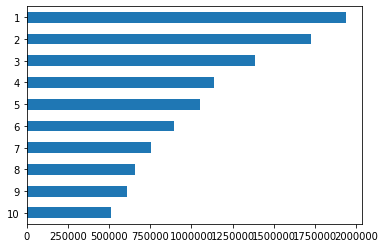

In [0]:
ax = icd_top10_df.sort_values('icd_code_10th_revision', ascending = 'False').icd_code_10th_revision.plot(kind='barh', facecolor='#fcba03')

In [0]:
df_merge.loc[df_merge['age']==999,'age']=None

In [0]:
df_merge['age'].describe()

count    2.771686e+07
mean     7.279748e+01
std      1.865350e+01
min      0.000000e+00
25%      6.300000e+01
50%      7.700000e+01
75%      8.600000e+01
max      1.260000e+02
Name: age, dtype: float64

In [0]:
df_merge['age_cut'] = pd.cut(df_merge['age'],15)

In [0]:
icd_cnt = df_merge.groupby('age_cut')['icd_code_10th_revision'].value_counts()

In [0]:
age_group_top5 = icd_cnt.groupby(['age_cut']).head(5)

In [0]:
pd.DataFrame(age_group_top5).head(50)

icd_code_10th_revision
age_cut       icd_code_10th_revision                        
(-0.126, 8.4] P072                                     36831
              R95                                      21910
              R99                                      14119
              P073                                     11318
              P011                                      8812
(8.4, 16.8]   X70                                       4537
              V892                                      4380
              X95                                       4153
              X74                                       1834
              G809                                      1794
(16.8, 25.2]  X95                                      42011
              V892                                     29851
              X42                                      20114
              X70                                      19324
              X44                                      17317
(25.2, 33.6]  X44                                      28509
              X42                                      28494
              X95                                      27494
              X70                                      17301
              V892                                     16372
(33.6, 42.0]  X44                                      34517
              X42                                      31776
              X70                                      18767
              X95                                      17811
              C509                                     16836
(42.0, 50.4]  C349                                     59626
              I219                                     53762
              I251                                     42059
              C509                                     39819
              X44                                      39031
(50.4, 58.8]  C349                                    182142
              I219                                    119572
              I251                                     94404
              I250                                     79706
              C509                                     68778
(58.8, 67.2]  C349                                    383118
              I219                                    201642
              I251                                    181905
              J449                                    147327
              I250                                    115568
(67.2, 75.6]  C349                                    441571
              I251                                    249040
              J449                                    240731
              I219                                    217256
              I250                                     94651
(75.6, 84.0]  I251                                    508449
              C349                                    450178
              J449                                    372236
              I219                                    342193
              F03                                     257698

In [0]:
sex_icd = df_merge.groupby('sex')['icd_code_10th_revision'].value_counts()

In [0]:
sex_icd.groupby('sex').head(10)

sex  icd_code_10th_revision
F    I251                       922448
     C349                       768438
     F03                        721714
     G309                       626180
     I219                       622679
     J449                       602655
     I64                        465218
     C509                       450892
     I500                       354457
     J189                       276400
M    I251                      1013928
     C349                       955147
     I219                       765648
     J449                       534241
     I250                       384104
     F03                        327644
     C61                        311877
     I64                        290151
     G309                       270020
     I500                       253307
Name: icd_code_10th_revision, dtype: int64

In [0]:
resident_icd = df_merge.groupby('resident_status')['icd_code_10th_revision'].value_counts()

In [0]:
resident_icd.groupby('resident_status').head(5)

resident_status  icd_code_10th_revision
1                I251                      1634050
                 C349                      1433177
                 I219                      1122578
                 J449                       964551
                 F03                        895518
2                I251                       243659
                 C349                       242189
                 I219                       214627
                 J449                       147755
                 F03                        133629
3                I251                        55923
                 I219                        48330
                 C349                        46825
                 I250                        26574
                 J449                        23983
4                I250                         3490
                 I219                         2792
                 I251                         2744
                 R99                      

In [0]:
year_icd = df_merge.groupby('current_data_year')['icd_code_10th_revision'].value_counts()

In [0]:
year_icd.groupby('current_data_year').head(5)

current_data_year  icd_code_10th_revision
2005               I251                      201017
                   C349                      158481
                   I219                      150972
                   J449                      107324
                   I64                        74482
2006               I251                      193479
                   C349                      157929
                   I219                      141472
                   J449                      103197
                   I64                        72545
2007               I251                      185385
                   C349                      158118
                   I219                      133006
                   J449                      106076
                   G309                       72647
2008               I251                      183626
                   C349                      157965
                   I219                      134053
                   J44

build a model of accidental death of xx /n
the coefficient
age 15-20 which is most likely to happen?
choose one factor and eliminate all other impact

